In [9]:
!pip install qiskit-aer

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.0/9.5 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.0/9.5 MB 245.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/9.5 MB 297.7 kB/s eta 0:00:32
   ---------------------------------------- 0.1/9.5 MB 350.1 kB/s eta 0:00:27
   ---------------------------------------- 0.1/9.5 MB 364.4 kB/s eta 0:00:26
    --------------------------------------- 0.1/9.5 MB 405.9 kB/s eta 0:00:24
    --------------------------------------- 0.2/9.5 MB 427.9 kB/s eta 0:00:22
    --------------------------------------- 0.2/9.5 MB 454.0 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.5 MB 429.5 kB/s eta 0:00:22
   - -------------------------------------- 0.2/9.5 MB 471.0 kB/s eta 0:00:20
   -

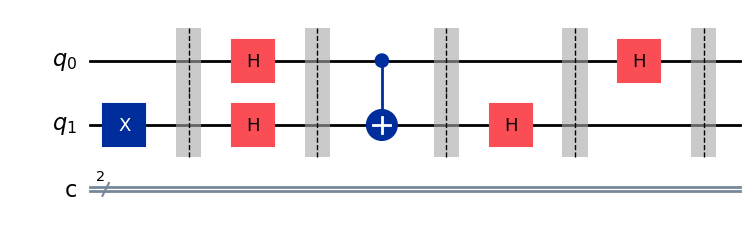

In [17]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
import math


# Create a quantum circuit with 2 qubits
circuit = QuantumCircuit(2, 2)

# Note: All qubits in qiskit systems start at state |0> 
# Thus we need to apply a NOT gate on q1 to set it to the state |1>
circuit.x(1)
circuit.barrier()

# next we apply Hadamard gates on both qubits in the register
circuit.h([0,1])
circuit.barrier()

# We then apply a Controlled NOT gate with the control qubit being q0 and the target q1
circuit.cx(0,1)
circuit.barrier()

# Apply another Hadamrd gate on q1
circuit.h(1)
circuit.barrier()

# Lastly we apply a Hadamard gate on q0
circuit.h(0)
circuit.barrier()

# Add measurements on all qubits in the circuit 
# circuit.measure([0,1],[0,1])

circuit.draw(output='mpl')

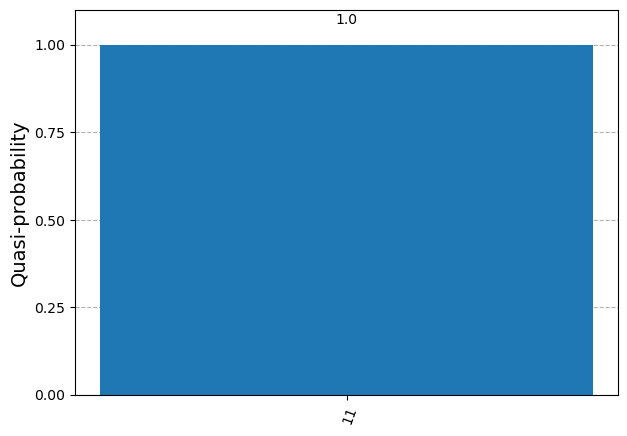

In [14]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService

# Initialize Aer Simulator
aer_sim = AerSimulator()

# Generate instructions for sampler
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(circuit)

# Create session using simulator and run
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()._pub_results[0].data.c.get_counts()

plot_distribution(result)